<a href="https://colab.research.google.com/github/mtanakakumw/evernote-sdk-ruby/blob/master/%E7%97%85%E5%BA%8A%E6%A9%9F%E8%83%BD%E5%A0%B1%E5%91%8A%E3%81%AE%E5%88%86%E6%9E%90%EF%BC%88%E7%97%85%E6%A3%9F%E7%A5%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.データの読み込み

In [0]:
!pip install mglearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import scipy as sp


     |████████████████████████████████| 542kB 6.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=020aa9b8bcf6b3c00b8b75f03b05c8b772b43b296ad1cdb038065ecc80f9c3d0
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
BED = pd.read_csv(filepath_or_buffer="BEDデータ.txt", encoding="utf_8", sep="\t", quotechar='"')

# 5.データセットの作成

In [0]:
# ラベル辞書作成関数
def make_label(BED, colname):
    target_values = BED[colname].values

    # ラベル辞書
    label = {}

    value = 0
    target = []
    for key in target_values:
        if not key in label.keys():
            label[key] = value
            value = value + 1
        target.append(label[key])
    return np.array(target), label

BED_dataset = {}

# 特徴量
df = BED.loc[:,"F13":"F308"]
BED_dataset['data'] = df.values
BED_dataset['feature_names'] = list(df.columns.values)

# ラベル
target, label = make_label(BED, 'F10')
BED_dataset['target'] = target
BED_dataset['target_names'] = list(label.keys())


# 6.教師あり学習（ロジスティック回帰による分類タスク）

## 6.1 訓練用及び検証用データセットの作成

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    BED_dataset['data'],
    BED_dataset['target'],
    random_state=0
)


In [0]:
from sklearn.preprocessing import MinMaxScaler
# 正規化
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6.2.	分類タスクの実行と評価

In [0]:
from sklearn.linear_model import LogisticRegression
logrec = LogisticRegression().fit(X_train_scaled, y_train)
print("Training set score:{:.2f}".format(logrec.score(X_train_scaled, y_train)))
print("Test set score:{:.2f}".format(logrec.score(X_test_scaled, y_test)))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score:0.85
Test set score:0.85


## 6.3.	混同行列と分類レポート

In [0]:
for i in range(len(BED_dataset['target_names'])):
    print("{} {}: {}".format(i, BED_dataset['target_names'][i], np.count_nonzero(BED_dataset['target']==i)))


0 慢性期: 5964
1 高度急性期: 5530
2 急性期: 11261
3 回復期: 2877
4 休棟中等: 214


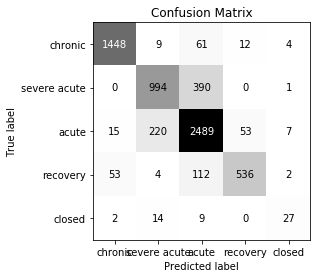

In [0]:
from sklearn.metrics import confusion_matrix 
pred_logrec = logrec.predict(X_test_scaled)

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred_logrec),
    xlabel='Predicted label',
    ylabel='True label',
    xticklabels=['chronic', 'severe acute', 'acute', 'recovery', 'closed'],
    yticklabels=['chronic', 'severe acute', 'acute', 'recovery', 'closed'],
    cmap=plt.cm.gray_r,
    fmt="%d"
)
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logrec))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1534
           1       0.80      0.72      0.76      1385
           2       0.81      0.89      0.85      2784
           3       0.89      0.76      0.82       707
           4       0.66      0.52      0.58        52

    accuracy                           0.85      6462
   macro avg       0.82      0.77      0.79      6462
weighted avg       0.85      0.85      0.85      6462



## 6.4.	ロジスティック回帰係数

Text(0, 0.5, 'Target')

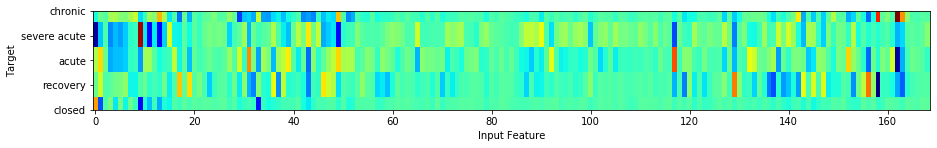

In [0]:
plt.figure(figsize=(15, 5))
plt.imshow(logrec.coef_, aspect=5, cmap='jet')
plt.yticks(range(5), ['chronic', 'severe acute', 'acute', 'recovery', 'closed'])
plt.xlabel("Input Feature")
plt.ylabel("Target")


In [0]:
df = pd.DataFrame(data=logrec.coef_.T, columns=['chronic', 'severe acute', 'acute', 'recovery', 'closed'], index=BED_dataset['feature_names'])
df.to_csv("logrec.coef_.csv", sep=",")

# 7. 教師なし学習

## 7.1.	主成分分析（PCA）

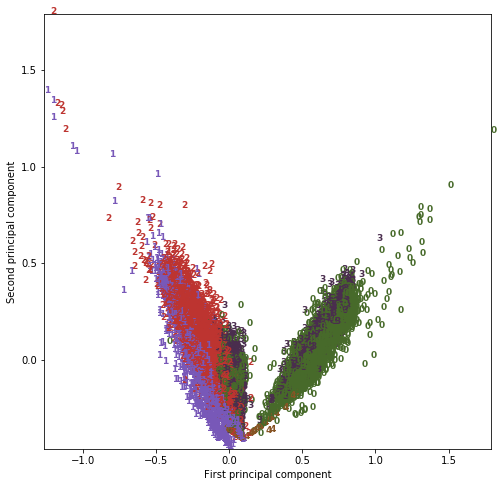

In [0]:
colors = ["#476a2a", "#7858b8", "#bd3430", "#4a2d4e", "#875525", "#a83683", "#4e655e", "#853541", "#3a3120"]

def plot2components(X, y, xlab, ylab):
  plt.figure(figsize=(8, 8))
  plt.xlim(X[:, 0].min(), X[:, 0].max())
  plt.ylim(X[:, 1].min(), X[:, 1].max())

  for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], str(y[i]),
            color=colors[y[i]],
            fontdict={'weight': 'bold', 'size': 9})

  plt.xlabel(xlab)
  plt.ylabel(ylab)

from sklearn.preprocessing import MinMaxScaler

X = BED_dataset['data']
y = BED_dataset['target']

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# 第1主成分と第2主成分によるプロット
plot2components(X_pca, y, "First principal component", "Second principal component")


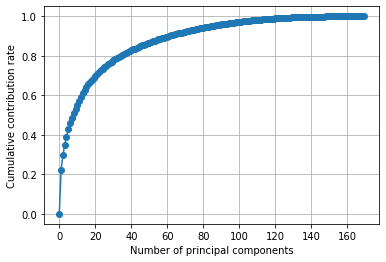

In [0]:
# 寄与率
pca = PCA(n_components=len(BED_dataset['feature_names']))
pca.fit(X_scaled)
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(pca.explained_variance_ratio_))])

# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()


## 7.2.	非負値行列因子分解（NMF）

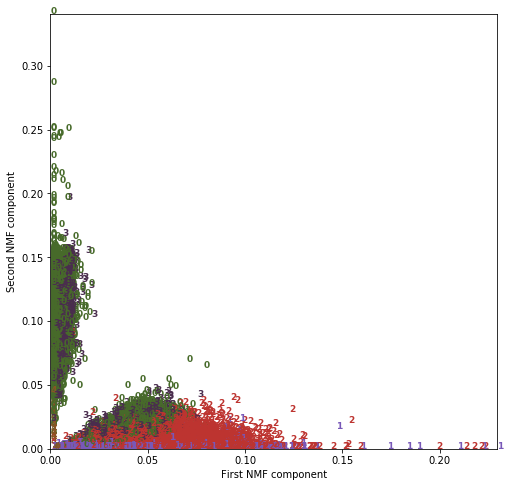

In [0]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, random_state=0)
nmf.fit(X_scaled)
X_nmf = nmf.transform(X_scaled)

plot2components(X_nmf, y, "First NMF component", "Second NMF component")


Text(0, 0.5, 'NMF component')

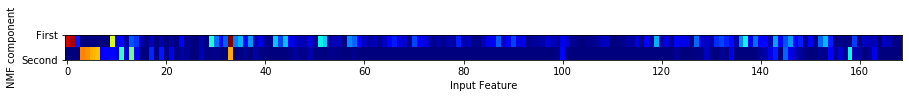

In [0]:
plt.figure(figsize=(15, 5))
plt.imshow(nmf.components_, aspect=5, cmap='jet')
plt.yticks(range(2), ['First','Second'])
plt.xlabel("Input Feature")
plt.ylabel("NMF component")

In [0]:
df = pd.DataFrame(data=nmf.components_.T, columns=['First', 'Second'], index=BED_dataset['feature_names'])
df.to_csv("nmf.components_.csv", sep=",")

## 7.3.	t-SNE

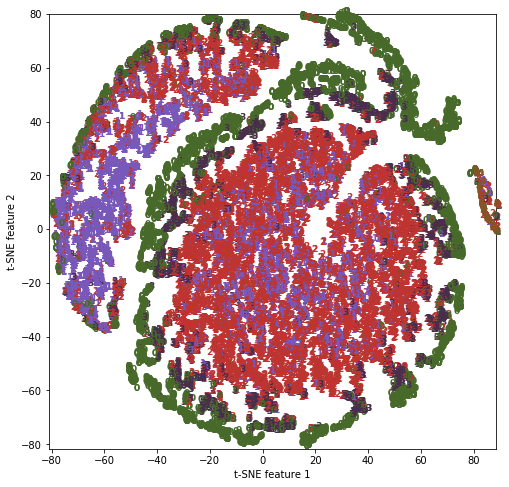

In [0]:
# オリジナルスケール（5分ほどかかる）
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

plot2components(X_tsne, y, 't-SNE feature 1', 't-SNE feature 2')


# 8. 特徴量の重要度

## 8.1.特徴量の重要度

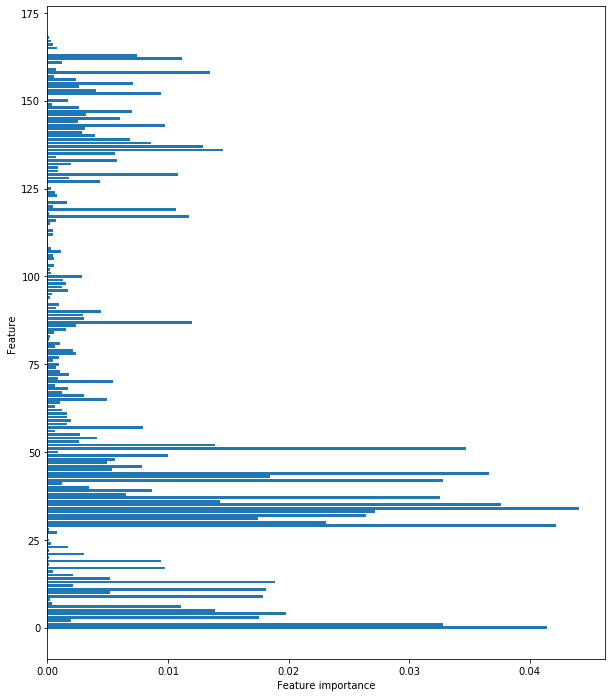

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, random_state=2).fit(X_train, y_train)
n_features = BED_dataset['data'].shape[1]
plt.figure(figsize=(10,12))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# 特徴量の重要度の出力
df = pd.DataFrame(forest.feature_importances_.T, index=BED_dataset['feature_names'], columns=['重要度'])
df.to_csv('forest.feature_importances_.csv', sep=',')